In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import shutil

print("✅ Libraries loaded successfully")

✅ Libraries loaded successfully


In [2]:
DATASET_PATH = './datasets/DRIVE'
PROCESSED_PATH = './datasets/DRIVE_processed'

# Check if dataset exists
if os.path.exists(DATASET_PATH):
    print(f"✅ Dataset found at: {DATASET_PATH}")
    print(f"Contents: {os.listdir(DATASET_PATH)}")
else:
    print(f"❌ Dataset not found at: {DATASET_PATH}")


✅ Dataset found at: ./datasets/DRIVE
Contents: ['test', 'training']


In [3]:
def explore_drive_structure():
    """DRIVE dataset structure ko explore karo"""
    
    training_images = os.path.join(DATASET_PATH, 'training', 'images')
    training_mask = os.path.join(DATASET_PATH, 'training', 'mask')
    test_images = os.path.join(DATASET_PATH, 'test', 'images')
    test_mask = os.path.join(DATASET_PATH, 'test', 'mask')
    
    print("=" * 50)
    print("DRIVE Dataset Structure:")
    print("=" * 50)
    
    if os.path.exists(training_images):
        files = os.listdir(training_images)
        print(f"\n📁 Training Images: {len(files)} files")
        print(f"   Sample: {files[:3]}")
        print(f"   File format: {files[0].split('.')[-1]}")
    
    if os.path.exists(training_mask):
        files = os.listdir(training_mask)
        print(f"\n📁 Training Mask: {len(files)} files")
        print(f"   Sample: {files[:3]}")
    
    if os.path.exists(test_images):
        files = os.listdir(test_images)
        print(f"\n📁 Test Images: {len(files)} files")
        print(f"   Sample: {files[:3]}")
    
    if os.path.exists(test_mask):
        files = os.listdir(test_mask)
        print(f"\n📁 Test Mask: {len(files)} files")
        print(f"   Sample: {files[:3]}")

explore_drive_structure()

DRIVE Dataset Structure:

📁 Training Images: 20 files
   Sample: ['21_training.tif', '22_training.tif', '23_training.tif']
   File format: tif

📁 Training Mask: 20 files
   Sample: ['21_training_mask.gif', '22_training_mask.gif', '23_training_mask.gif']

📁 Test Images: 20 files
   Sample: ['01_test.tif', '02_test.tif', '03_test.tif']

📁 Test Mask: 20 files
   Sample: ['01_test_mask.gif', '02_test_mask.gif', '03_test_mask.gif']



📸 Available DRIVE images: 20
Files: ['21_training.tif', '22_training.tif', '23_training.tif', '24_training.tif', '25_training.tif', '26_training.tif', '27_training.tif', '28_training.tif', '29_training.tif', '30_training.tif', '31_training.tif', '32_training.tif', '33_training.tif', '34_training.tif', '35_training.tif', '36_training.tif', '37_training.tif', '38_training.tif', '39_training.tif', '40_training.tif']

✅ Image loaded successfully!
Shape: (584, 565, 3)
Data type: uint8


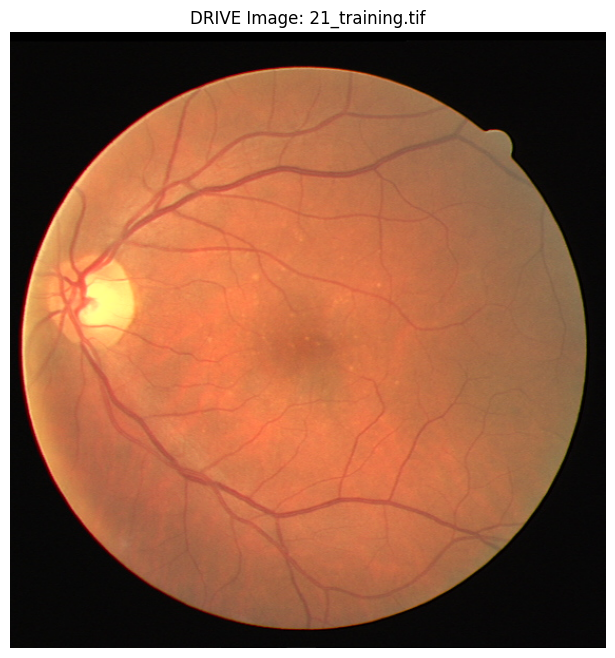

In [5]:
def load_drive_image(image_name):
    """DRIVE se image load karo (TIF format)"""
    training_images_path = os.path.join(DATASET_PATH, 'training', 'images')
    image_path = os.path.join(training_images_path, image_name)
    
    # TIF file ko load karo
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    
    if img is None:
        print(f"❌ Failed to load: {image_path}")
        return None
    
    return img

# List all training images
training_images_path = os.path.join(DATASET_PATH, 'training', 'images')
all_images = sorted(os.listdir(training_images_path))

print(f"\n📸 Available DRIVE images: {len(all_images)}")
print(f"Files: {all_images}")

# Load first image
if all_images:
    first_image = load_drive_image(all_images[0])
    if first_image is not None:
        print(f"\n✅ Image loaded successfully!")
        print(f"Shape: {first_image.shape}")
        print(f"Data type: {first_image.dtype}")
        
        # Display
        plt.figure(figsize=(10, 8))
        plt.imshow(cv2.cvtColor(first_image, cv2.COLOR_BGR2RGB))
        plt.title(f"DRIVE Image: {all_images[0]}")
        plt.axis('off')
        plt.show()


In [6]:
def convert_tif_to_png():
    """DRIVE TIF images ko PNG mein convert karo"""
    
    # Create processed directory
    os.makedirs(PROCESSED_PATH, exist_ok=True)
    os.makedirs(os.path.join(PROCESSED_PATH, 'training_images'), exist_ok=True)
    os.makedirs(os.path.join(PROCESSED_PATH, 'test_images'), exist_ok=True)
    
    # Convert training images
    training_path = os.path.join(DATASET_PATH, 'training', 'images')
    for filename in os.listdir(training_path):
        if filename.endswith('.tif'):
            img = cv2.imread(os.path.join(training_path, filename))
            png_filename = filename.replace('.tif', '.png')
            cv2.imwrite(
                os.path.join(PROCESSED_PATH, 'training_images', png_filename),
                img
            )
            print(f"✅ Converted: {filename} → {png_filename}")
    
    # Convert test images
    test_path = os.path.join(DATASET_PATH, 'test', 'images')
    for filename in os.listdir(test_path):
        if filename.endswith('.tif'):
            img = cv2.imread(os.path.join(test_path, filename))
            png_filename = filename.replace('.tif', '.png')
            cv2.imwrite(
                os.path.join(PROCESSED_PATH, 'test_images', png_filename),
                img
            )
            print(f"✅ Converted: {filename} → {png_filename}")
    
    print(f"\n✅ All images converted to PNG!")
    print(f"Location: {PROCESSED_PATH}")

# Convert TIF to PNG
print("\n🔄 Converting TIF images to PNG format...")
convert_tif_to_png()



🔄 Converting TIF images to PNG format...
✅ Converted: 21_training.tif → 21_training.png
✅ Converted: 22_training.tif → 22_training.png
✅ Converted: 23_training.tif → 23_training.png
✅ Converted: 24_training.tif → 24_training.png
✅ Converted: 25_training.tif → 25_training.png
✅ Converted: 26_training.tif → 26_training.png
✅ Converted: 27_training.tif → 27_training.png
✅ Converted: 28_training.tif → 28_training.png
✅ Converted: 29_training.tif → 29_training.png
✅ Converted: 30_training.tif → 30_training.png
✅ Converted: 31_training.tif → 31_training.png
✅ Converted: 32_training.tif → 32_training.png
✅ Converted: 33_training.tif → 33_training.png
✅ Converted: 34_training.tif → 34_training.png
✅ Converted: 35_training.tif → 35_training.png
✅ Converted: 36_training.tif → 36_training.png
✅ Converted: 37_training.tif → 37_training.png
✅ Converted: 38_training.tif → 38_training.png
✅ Converted: 39_training.tif → 39_training.png
✅ Converted: 40_training.tif → 40_training.png
✅ Converted: 01_te

In [7]:
def get_dataset_stats():
    """Dataset statistics calculate karo"""
    
    training_path = os.path.join(DATASET_PATH, 'training', 'images')
    test_path = os.path.join(DATASET_PATH, 'test', 'images')
    
    training_images = [f for f in os.listdir(training_path) if f.endswith('.tif')]
    test_images = [f for f in os.listdir(test_path) if f.endswith('.tif')]
    
    print("\n" + "=" * 50)
    print("📊 DRIVE Dataset Statistics:")
    print("=" * 50)
    print(f"Total Training Images: {len(training_images)}")
    print(f"Total Test Images: {len(test_images)}")
    print(f"Total Images: {len(training_images) + len(test_images)}")
    print(f"Image Resolution: 565 × 584 pixels (standard DRIVE)")
    print(f"Color Space: RGB")
    print("=" * 50)

get_dataset_stats()


📊 DRIVE Dataset Statistics:
Total Training Images: 20
Total Test Images: 20
Total Images: 40
Image Resolution: 565 × 584 pixels (standard DRIVE)
Color Space: RGB


In [8]:
# Cell 7: Create Data Loading Function
def create_data_loader():
    """Dataset loader function banao"""
    
    code = '''
import cv2
import numpy as np
import os

class DRIVEDataLoader:
    def __init__(self, dataset_path='./datasets/DRIVE'):
        self.dataset_path = dataset_path
        self.training_images_path = os.path.join(dataset_path, 'training', 'images')
        self.test_images_path = os.path.join(dataset_path, 'test', 'images')
    
    def load_image(self, filename, image_type='training'):
        """Load DRIVE image"""
        if image_type == 'training':
            path = os.path.join(self.training_images_path, filename)
        else:
            path = os.path.join(self.test_images_path, filename)
        
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        return img
    
    def get_all_training_images(self):
        """Get all training image names"""
        return sorted(os.listdir(self.training_images_path))
    
    def get_all_test_images(self):
        """Get all test image names"""
        return sorted(os.listdir(self.test_images_path))
    
    def load_batch(self, image_names, image_type='training'):
        """Load multiple images as batch"""
        batch = []
        for name in image_names:
            img = self.load_image(name, image_type)
            if img is not None:
                batch.append(img)
        return np.array(batch)
'''
    
    # Save to file
    with open('drive_dataloader.py', 'w') as f:
        f.write(code)
    
    print("✅ drive_dataloader.py created successfully!")
    print("   Usage: from drive_dataloader import DRIVEDataLoader")
    print("   loader = DRIVEDataLoader()")
    print("   img = loader.load_image('21_training.tif')")

create_data_loader()

print("\n" + "=" * 50)
print("✅ DATASET SETUP COMPLETE!")
print("=" * 50)
print("Next steps:")
print("1. Run image_processing.ipynb with DRIVE dataset")
print("2. Add salt-and-pepper noise to real retinal images")
print("3. Test all denoising filters")

✅ drive_dataloader.py created successfully!
   Usage: from drive_dataloader import DRIVEDataLoader
   loader = DRIVEDataLoader()
   img = loader.load_image('21_training.tif')

✅ DATASET SETUP COMPLETE!
Next steps:
1. Run image_processing.ipynb with DRIVE dataset
2. Add salt-and-pepper noise to real retinal images
3. Test all denoising filters
